In [1]:
from neuralNet import MatrixNeuralNet
from pdes import LinearQuadraticRegulator2D
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import setLogger

setLogger("training")

In [18]:
layers = [2, 20, 20, 3]
network = MatrixNeuralNet( layers)
print( network.model )
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

lrs = [1e-2, 1e-3]
iterations = [1000, 2000]

resu = pde.train(
    interiorPointCount=10,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=3, bias=True)
)
2024-08-04 18:27:34,076 - training - INFO - 0 / 3000 (0 / 1000), lr:1.0e-02, loss:1.42e+01 (data: 0.00e+00, grad: 0.00e+00, res: 1.42e+01)


2024-08-04 18:27:37,599 - training - INFO - 1000 / 3000 (0 / 2000), lr:1.0e-03, loss:2.51e-06 (data: 0.00e+00, grad: 0.00e+00, res: 2.51e-06)
2024-08-04 18:27:40,869 - training - INFO - 2000 / 3000 (1000 / 2000), lr:1.0e-03, loss:1.36e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.36e-05)


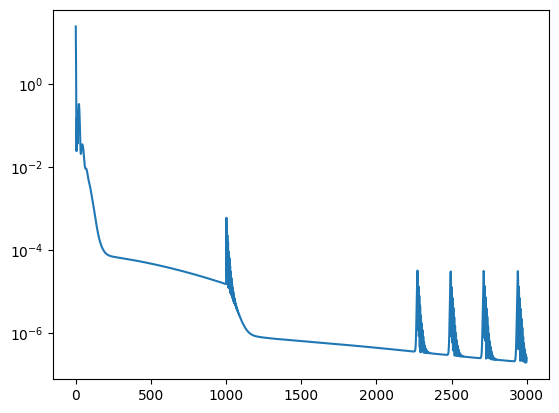

In [14]:
ax = resu['loss'].plot()
ax.set_yscale("log")

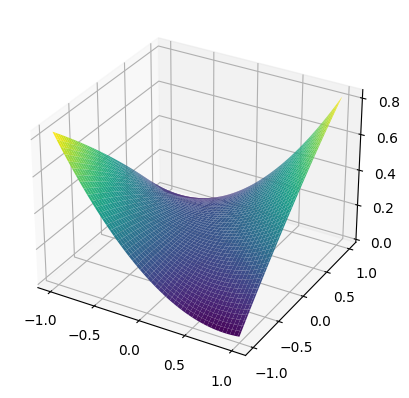

In [15]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints() 

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

# Convex network

In [9]:
from neuralNet import ConvexNeuralNet
from icnn import get_model
from neuralNet import MatrixNeuralNet
from pdes import LinearQuadraticRegulator2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from utils import setLogger

setLogger("training")

In [2]:
# Sequential(
#   (0): Linear(in_features=2, out_features=20, bias=True)
#   (1): Sigmoid()
#   (2): Linear(in_features=20, out_features=20, bias=True)
#   (3): Sigmoid()
#   (4): Linear(in_features=20, out_features=3, bias=True)
# )

In [3]:
from icnn import ACTIVATION_FUNCTIONS

In [4]:
layers = [2, 20, 20, 1]
convexModel = get_model("icnn", num_hidden=32, bad_init=True, activation='elu')
network = ConvexNeuralNet( layers, convexModel)
gamma = {'data': 0, 'gradient': 0, 'residual': 1}
pde = LinearQuadraticRegulator2D( network, gamma )

print(network.model)

lrs = [1e-3, 1e-4, 1e-5]
iterations = [1000, 2000, 3000]

resu = pde.train(
    interiorPointCount=100,
    dataPointCount=10,
    lrs=lrs,
    iterations=iterations,
    sampling='random'
    )

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ELU(alpha=1.0)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): ELU(alpha=1.0)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-04 23:17:09,540 - training - INFO - 0 / 6000 (0 / 1000), lr:1.0e-03, loss:1.18e+01 (data: 0.00e+00, grad: 0.00e+00, res: 1.18e+01)
2024-08-04 23:17:10,908 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:4.85e-04 (data: 0.00e+00, grad: 0.00e+00, res: 4.85e-04)
2024-08-04 23:17:12,263 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:1.23e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.23e-05)
2024-08-04 23:17:13,607 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:4.84e-06 (data: 0.00e+00, grad: 0.00e+00, res: 4.84e-06)
2024-08-04 23:17:14,949 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:3.74e-06 (data: 0.00e+00, grad: 0.00e+00, res: 3.74e-06)
2024-08-04 23:17:16,332 - training - INFO - 5

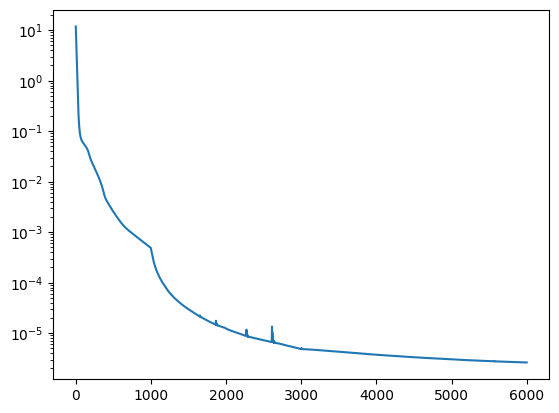

In [5]:
ax = resu['loss'].plot()
ax.set_yscale("log")

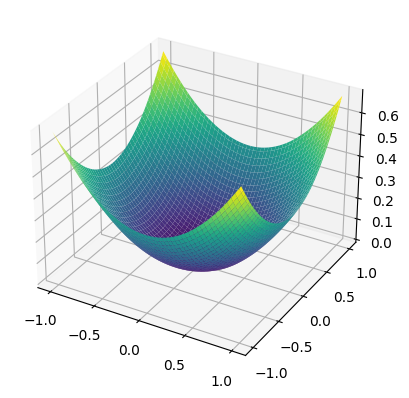

In [6]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');

# Activation function experiments

In [7]:
res = []

for key in ACTIVATION_FUNCTIONS.keys():
    layers = [2, 20, 20, 1]
    convexModel = get_model("icnn", num_hidden=32, bad_init=True, activation=key)
    network = ConvexNeuralNet( layers, convexModel)
    gamma = {'data': 0, 'gradient': 0, 'residual': 1}
    pde = LinearQuadraticRegulator2D( network, gamma )

    print(network.model)

    lrs = [1e-3, 1e-4, 1e-5]
    iterations = [1000, 2000, 3000]

    resu = pde.train(
        interiorPointCount=100,
        dataPointCount=10,
        lrs=lrs,
        iterations=iterations,
        sampling='random'
        )
    
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)

    X, Y = np.meshgrid(x, y)
    space = pde.getEvaluationPoints()

    Z = pde.network.computeValueFunction(space).reshape(-1, 100) - pde.network.computeValueFunction(space).reshape(-1, 100).min()
    res.append({"activation": key, "loss": resu['loss'].iloc[-1], "value": Z})

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ELU(alpha=1.0)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): ELU(alpha=1.0)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-04 23:17:18,269 - training - INFO - 0 / 6000 (0 / 1000), lr:1.0e-03, loss:5.76e-02 (data: 0.00e+00, grad: 0.00e+00, res: 5.76e-02)
2024-08-04 23:17:19,708 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:2.67e-05 (data: 0.00e+00, grad: 0.00e+00, res: 2.67e-05)
2024-08-04 23:17:21,164 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:1.00e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.00e-05)
2024-08-04 23:17:22,522 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:6.79e-06 (data: 0.00e+00, grad: 0.00e+00, res: 6.79e-06)
2024-08-04 23:17:23,847 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:6.24e-06 (data: 0.00e+00, grad: 0.00e+00, res: 6.24e-06)
2024-08-04 23:17:25,223 - training - INFO - 5

/Users/alaignelet/Documents/08_PhD/pde_project/optimal_control/.venv/lib/python3.10/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


2024-08-04 23:20:00,690 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:1.01e-03 (data: 0.00e+00, grad: 0.00e+00, res: 1.01e-03)
2024-08-04 23:20:02,154 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:7.03e-04 (data: 0.00e+00, grad: 0.00e+00, res: 7.03e-04)
2024-08-04 23:20:03,583 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:4.86e-04 (data: 0.00e+00, grad: 0.00e+00, res: 4.86e-04)
2024-08-04 23:20:05,051 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:4.65e-04 (data: 0.00e+00, grad: 0.00e+00, res: 4.65e-04)
2024-08-04 23:20:06,498 - training - INFO - 5000 / 6000 (2000 / 3000), lr:1.0e-05, loss:4.45e-04 (data: 0.00e+00, grad: 0.00e+00, res: 4.45e-04)
Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): Softmax(dim=None)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): Softmax(dim=None)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-04 23:20:07,915 - trainin

/Users/alaignelet/Documents/08_PhD/pde_project/optimal_control/.venv/lib/python3.10/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


2024-08-04 23:20:09,304 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:1.65e-03 (data: 0.00e+00, grad: 0.00e+00, res: 1.65e-03)
2024-08-04 23:20:10,689 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:1.00e-03 (data: 0.00e+00, grad: 0.00e+00, res: 1.00e-03)
2024-08-04 23:20:12,072 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:5.62e-04 (data: 0.00e+00, grad: 0.00e+00, res: 5.62e-04)
2024-08-04 23:20:13,547 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:5.23e-04 (data: 0.00e+00, grad: 0.00e+00, res: 5.23e-04)
2024-08-04 23:20:14,950 - training - INFO - 5000 / 6000 (2000 / 3000), lr:1.0e-05, loss:4.89e-04 (data: 0.00e+00, grad: 0.00e+00, res: 4.89e-04)
Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): LogSoftmax(dim=None)
  (2): ConvexLinear(in_features=32, out_features=32, bias=True)
  (3): LogSoftmax(dim=None)
  (4): ConvexLinear(in_features=32, out_features=1, bias=True)
)
2024-08-04 23:20:16,316 - t

/Users/alaignelet/Documents/08_PhD/pde_project/optimal_control/.venv/lib/python3.10/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


2024-08-04 23:20:17,699 - training - INFO - 1000 / 6000 (0 / 2000), lr:1.0e-04, loss:1.22e-05 (data: 0.00e+00, grad: 0.00e+00, res: 1.22e-05)
2024-08-04 23:20:19,148 - training - INFO - 2000 / 6000 (1000 / 2000), lr:1.0e-04, loss:1.95e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.95e-06)
2024-08-04 23:20:20,592 - training - INFO - 3000 / 6000 (0 / 3000), lr:1.0e-05, loss:1.62e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.62e-06)
2024-08-04 23:20:21,969 - training - INFO - 4000 / 6000 (1000 / 3000), lr:1.0e-05, loss:1.43e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.43e-06)
2024-08-04 23:20:23,340 - training - INFO - 5000 / 6000 (2000 / 3000), lr:1.0e-05, loss:1.22e-06 (data: 0.00e+00, grad: 0.00e+00, res: 1.22e-06)


In [11]:
res = pd.DataFrame(res).sort_values("loss")

In [12]:
res

,activation,loss,value
19,tanhshrink,5.681541e-07,"[[tensor(0.0010, grad_fn=<UnbindBackward0>), t..."
14,mish,8.655789e-07,"[[tensor(0.6871, grad_fn=<UnbindBackward0>), t..."
11,gelu,8.903212e-07,"[[tensor(0.6901, grad_fn=<UnbindBackward0>), t..."
22,logsoftmax,1.033453e-06,"[[tensor(0., grad_fn=<UnbindBackward0>), tenso..."
10,celu,4.092512e-06,"[[tensor(0.6884, grad_fn=<UnbindBackward0>), t..."
17,softsign,4.170861e-06,"[[tensor(0.1310, grad_fn=<UnbindBackward0>), t..."
0,elu,4.840751e-06,"[[tensor(0.6888, grad_fn=<UnbindBackward0>), t..."
18,tanh,6.834813e-06,"[[tensor(0.0057, grad_fn=<UnbindBackward0>), t..."
4,logsigmoid,7.512599e-06,"[[tensor(0.0002, grad_fn=<UnbindBackward0>), t..."
12,sigmoid,9.206949e-05,"[[tensor(0.0026, grad_fn=<UnbindBackward0>), t..."


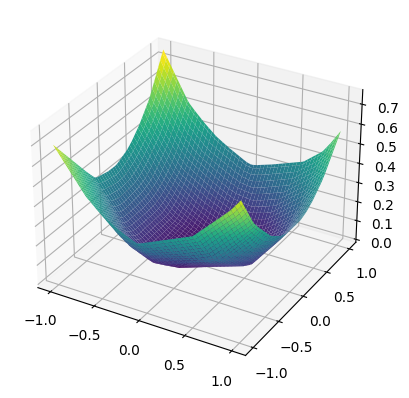

In [32]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
space = pde.getEvaluationPoints()

Z = res['value'].iloc[19]

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().cpu().numpy(), cmap='viridis');